# Import Packages

In [ ]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
# import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence \
import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm
from ISLP import load_data
from ISLP.models import (ModelSpec as MS ,
                              summarize,
                              poly)

# ISLP – Auto Dataset, Question 8

Simple linear regression of `mpg` (response) on `horsepower` (predictor).

- Part (a): Fit model and interpret output
- Part (b): Plot data and regression line
- Part (c): Diagnostic plots and comments

## Load the `Auto` data

In [ ]:
Auto = load_data('Auto')
Auto.describe()
# Auto.columns
# Auto.shape

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


## Part (a): Simple linear regression of mpg on horsepower

In [ ]:
y = Auto['mpg'] # response
X = Auto['horsepower'] # predictor
X = sm.add_constant(X) # add intercept

X.head()

,const,horsepower
name,,
chevrolet chevelle malibu,1.0,130
buick skylark 320,1.0,165
plymouth satellite,1.0,150
amc rebel sst,1.0,150
ford torino,1.0,140


### Fit the model and view summary

In [ ]:
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Thu, 13 Nov 2025   Prob (F-statistic):           7.03e-81
Time:                        21:32:53   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.9359      0.717     55.660      0.000      38.525      41.347
horsepower    -0.1578      0.006    -24.489      0.000      -0.171      -0.145
==============================================================================
Omnibus:                       16.432   Durbin-Watson:                   0.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.305
Skew:                           0.492   Prob(JB):                     0.000175
Kurtosis:                       3.299   Cond. No.                         322.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Interpretation of regression output


**1. Is there a relationship between horsepower and mpg?**

Yes.
The p-value for the horsepower coefficient is **< 0.0001**, which is extremely small.
This means **horsepower is a statistically significant predictor** of mpg.

---

**2. What is the direction of the relationship?**

The coefficient for horsepower is:

**β₁ = –0.1578**

This is **negative**, so:

* As horsepower increases, mpg **decreases**.
* Cars with more horsepower tend to have **lower fuel efficiency**.

---

**3. How strong is the relationship?**

* **R² = 0.606**
  This means about **60.6 percent** of the variation in mpg is explained by horsepower alone.

* The **F-statistic is 599.7** with a p-value of **7.03e-81**, which confirms the model is highly significant.

This is a **strong linear relationship** for a single-variable model.

---

**4. Interpret the coefficients**

* **Intercept (β₀ = 39.9359)**
  When horsepower = 0, the predicted mpg is about 39.94.
  (This is not physically meaningful, but it is the baseline of the model.)

* **Slope (β₁ = –0.1578)**
  For each 1-unit increase in horsepower, mpg **decreases by about 0.158 mpg** on average.

---

**5. Are the coefficients statistically significant?**

Both coefficients have p-values **< 0.0001**, meaning:

* The intercept is significant
* The slope (horsepower) is highly significant

Thus, horsepower is an important predictor of mpg.

---

**6. Confidence interval for the slope**

95 percent CI for horsepower:

**[–0.171, –0.145]**

Because the entire interval is **negative**, the negative relationship is **statistically guaranteed** at the 95 percent confidence level.

---

**7. Normality and diagnostic quick check**

* Jarque-Bera (JB) p-value = **0.000175**
  → Residuals are *not perfectly normal*, but this is common with large samples.

* Skew = **0.492**, Kurtosis = **3.299**
  → Slight right skew but not severe.

* Durbin-Watson = **0.920**
  → Slight positive autocorrelation in residuals (not a huge problem here).

Diagnostics slightly warn that the model is not perfect, but **the main conclusion still holds**.

---

**8. Overall conclusion**

There is a **strong, negative, statistically significant** linear relationship between horsepower and mpg.
Horsepower alone explains roughly **61 percent** of the variation in fuel efficiency, and the model confirms that:

> **Cars with higher horsepower tend to consume more fuel and achieve lower mpg.**


## Part (b): Plot mpg vs horsepower with fitted regression line

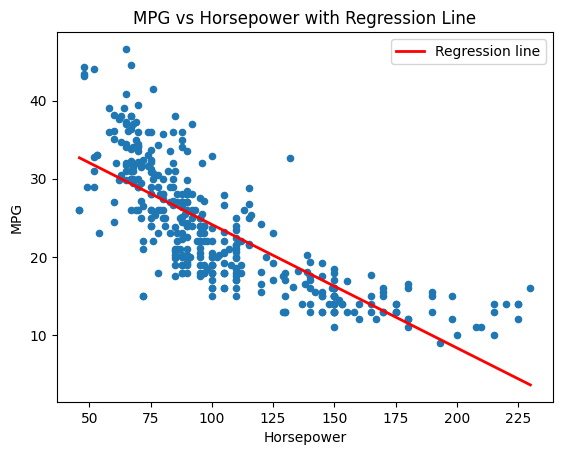

In [ ]:
ax = Auto.plot.scatter(x="horsepower", y="mpg")

# Add regression line using the fitted model
horsepower_range = np.linspace(Auto['horsepower'].min(), Auto['horsepower'].max(), 100)
X_pred = sm.add_constant(horsepower_range)
y_pred = model.predict(X_pred)

ax.plot(horsepower_range, y_pred, color='red', linewidth=2, label='Regression line')
ax.set_xlabel('Horsepower')
ax.set_ylabel('MPG')
ax.set_title('MPG vs Horsepower with Regression Line')
ax.legend();

## Part (c): Regression diagnostics

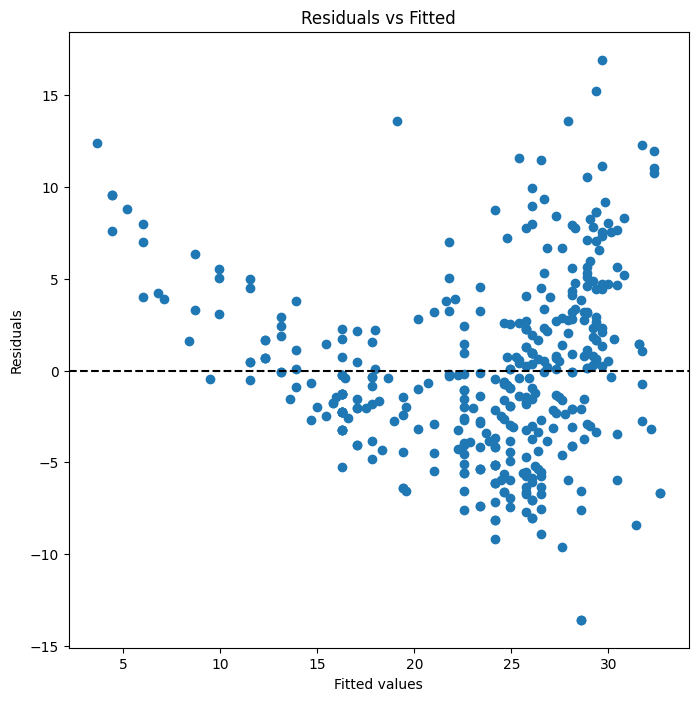

In [ ]:
fitted = model.fittedvalues
residuals = model.resid

ax = subplots(figsize=(8,8))[1]
ax.scatter(fitted, residuals)
ax.axhline(0, c='k', linestyle="--")
ax.set_xlabel("Fitted values")
ax.set_ylabel("Residuals")
ax.set_title("Residuals vs Fitted");


Text(0, 0.5, 'Leverage')

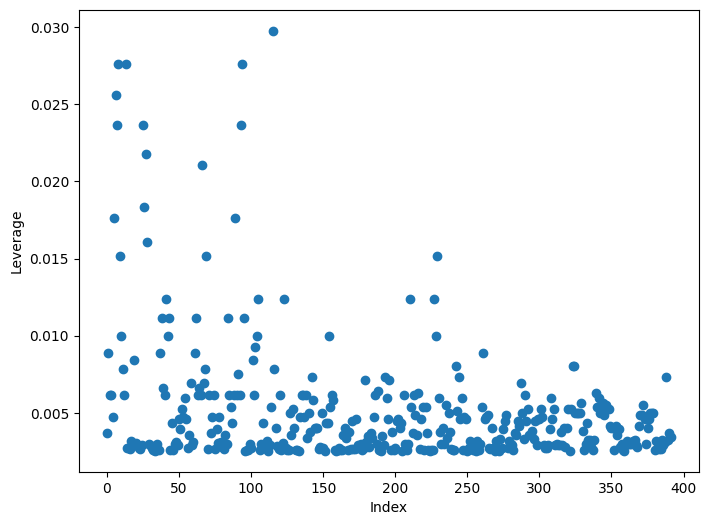

In [ ]:
infl = model.get_influence()
ax = subplots(figsize=(8,6))[1]
ax.scatter(np.arange(X.shape[0]), infl.hat_matrix_diag)
ax.set_xlabel("Index")
ax.set_ylabel("Leverage")



# ISLP – Auto Dataset, Question 9

Multiple linear regression of `mpg` on the full Auto feature set. Use the scaffolding below to add your analysis.


## Load the `Auto` data

In [8]:
Auto = load_data('Auto')
# Auto.describe()
Auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
name,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
ford torino,17.0,8,302.0,140,3449,10.5,70,1


## Part (a): Scatterplot matrix

Produce a scatterplot matrix for all predictors and the response (`mpg`).


/tmp/ipykernel_33448/4275537242.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  pd.plotting.scatter_matrix(Auto, ax=ax)


Text(0.5, 1.0, 'Scatterplot Matrix')

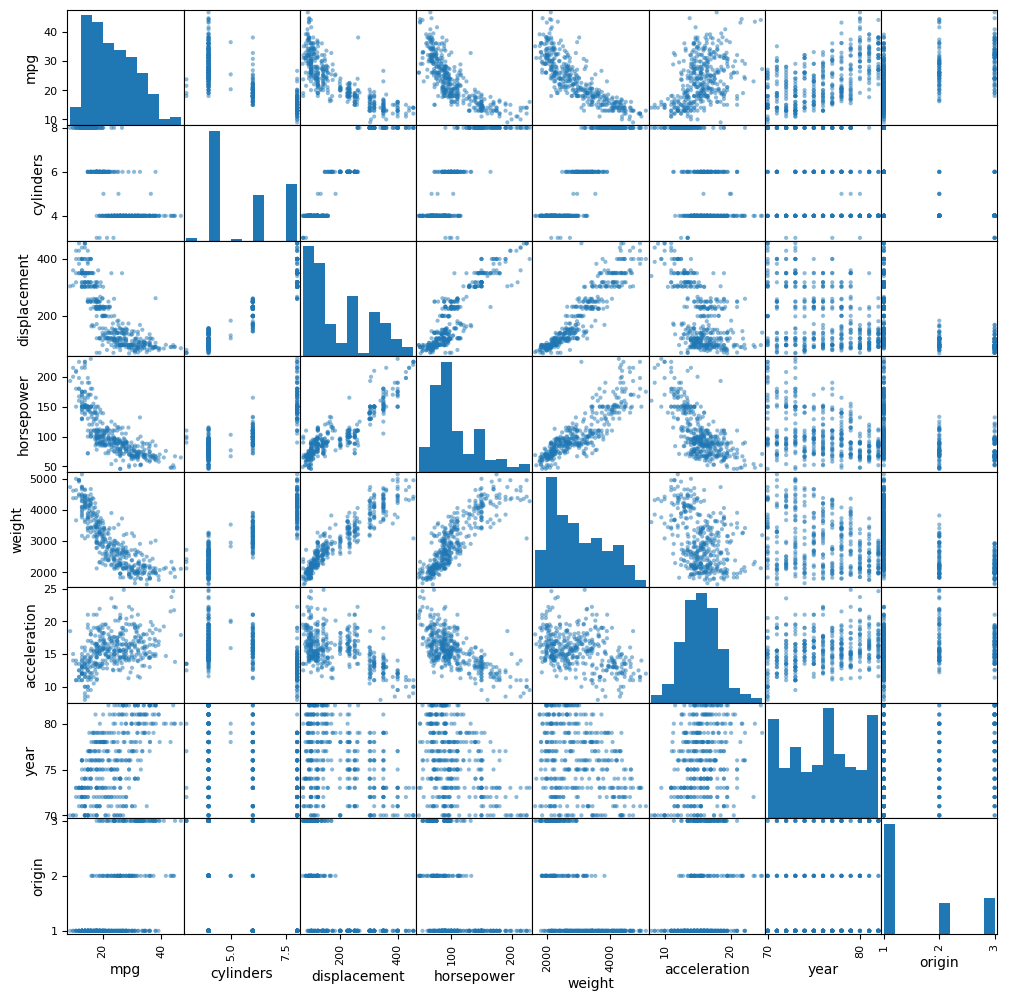

In [ ]:
#create a scatterplot matrix for the Auto data
ax = subplots(figsize=(12, 12))[1]
pd.plotting.scatter_matrix(Auto, ax=ax)
ax.set_title("Scatterplot Matrix")


## Part (b): Correlation matrix

Use `Auto.corr()` to inspect pairwise correlations between the numeric variables.


In [ ]:
# compute and view the correlation matrix for the numeric features
pd.DataFrame(Auto.corr(), columns=Auto.columns, index=Auto.columns)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


## Part (c): Multiple linear regression with `mpg` response

Fit an OLS model with `mpg` as the response and all other predictors except `name`. Summarize and answer the sub-questions with `anova_lm` and the coefficient table.

- Is there an overall relationship between the predictors and `mpg`?
- Which predictors are statistically significant?
- Interpret the coefficient for `year`.


In [46]:
# fit the full multiple linear regression model
pred_terms = Auto.drop(columns=['mpg'])
predictors = MS(pred_terms).fit(Auto)
y= np.array(Auto['mpg'])
X = predictors.transform(Auto)
print("=========== Model Summary ============")
lm_pred = sm.OLS(y, X).fit()
display(summarize(lm_pred))
df = anova_lm(*[sm.OLS(y, P).fit() for P in predictors.build_sequence(Auto, anova_type='sequential')])
df.index = predictors.names
print("\n")
print("======== Sequential ANOVA table ========")
display(df)

=========== Model Summary ============


,coef,std err,t,P>|t|
intercept,-17.2184,4.644,-3.707,0.000
cylinders,-0.4934,0.323,-1.526,0.128
displacement,0.0199,0.008,2.647,0.008
horsepower,-0.0170,0.014,-1.230,0.220
weight,-0.0065,0.001,-9.929,0.000
acceleration,0.0806,0.099,0.815,0.415
year,0.7508,0.051,14.729,0.000
origin,1.4261,0.278,5.127,0.000




======== Sequential ANOVA table ========


,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
intercept,391.0,23818.993469,0.0,NaN,NaN,NaN
cylinders,390.0,9415.910391,1.0,14403.083079,1300.683788,2.806569e-126
displacement,389.0,8342.566366,1.0,1073.344025,96.929329,1.442524e-20
horsepower,388.0,7939.158297,1.0,403.408069,36.430140,3.700154e-09
weight,387.0,6963.433344,1.0,975.724953,88.113748,5.378297e-19
acceleration,386.0,6962.467273,1.0,0.966071,0.087242,7.678720e-01
year,385.0,4543.347025,1.0,2419.120249,218.460900,1.794078e-39
origin,384.0,4252.212530,1.0,291.134494,26.291171,4.665681e-07


## Part (d): Diagnostic plots

Replicate the diagnostic plots from the lab (residuals vs fitted, leverage/influence).


Text(0.5, 1.0, 'Leverage Plot')

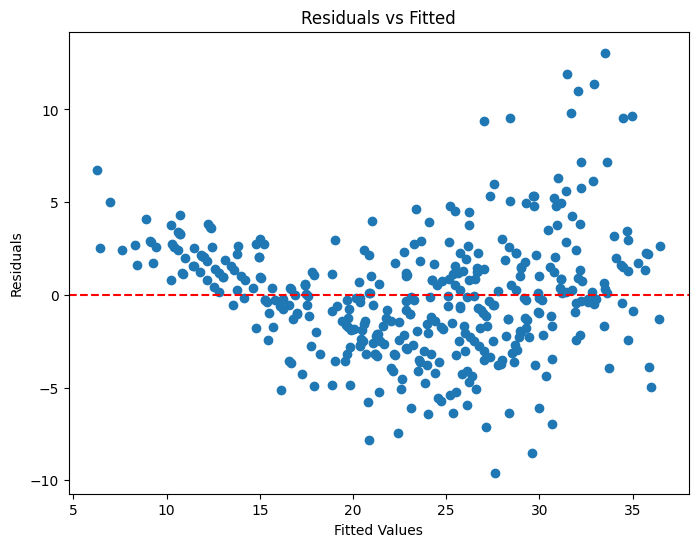

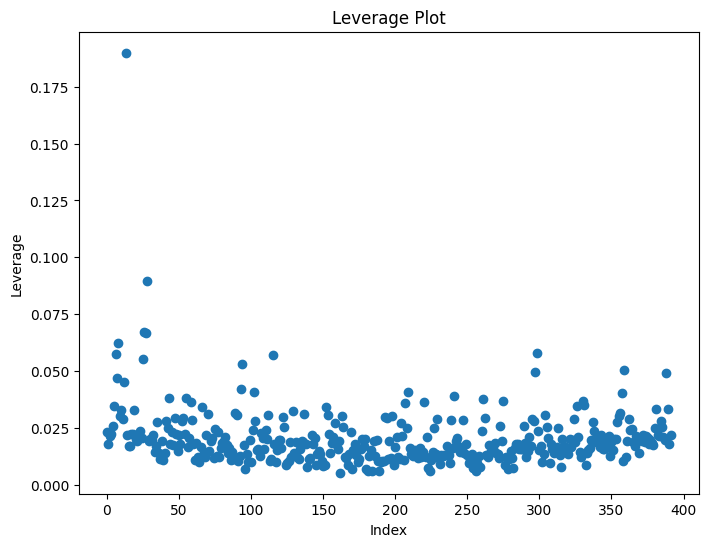

In [56]:
# generate diagnostic plots for the multiple linear regression fit

# Residual vs Fitted Plot
ax = subplots(figsize=(8,6))[1]
ax.scatter(lm_pred.fittedvalues, lm_pred.resid)
ax.set_xlabel("Fitted Values")
ax.set_ylabel("Residuals")
ax.axhline(0, c='red', ls='--')
ax.set_title("Residuals vs Fitted")

# Leverage/Influence Plot
ax = subplots(figsize=(8,6))[1]
infl = lm_pred.get_influence()
ax.scatter(np.arange(X.shape[0]), infl.hat_matrix_diag)
ax.set_xlabel("Index")
ax.set_ylabel("Leverage")
ax.set_title("Leverage Plot")


## Part (e): Interaction terms

Augment the model with interaction terms (e.g., between `year` and horsepower or displacement). Identify any statistically significant interactions.


In [ ]:
# TODO: explore models with interaction terms
# Example: X_int = X.assign(year_hp=Auto['year'] * Auto['horsepower'])
# sm.OLS(y, sm.add_constant(X_int)).fit().summary()


## Part (f): Transformations

Experiment with log, square-root, or squared transformations of predictors/response and note any improvements in model diagnostics.


In [ ]:
# TODO: try variable transformations (e.g., np.log(Auto['horsepower'])) and compare fits
# Keep results handy for discussion in the markdown below.


## Findings and discussion

General comment: The multiple regression fit explains about 82% of the mpg variability and the global F-test is overwhelmingly significant, so the predictors collectively relate to mpg. From the coefficient table in the summary slide, displacement, weight, year, and origin have strong t-statistics (p < 0.01), while cylinders, horsepower, and acceleration are not significant at the 5% level, suggesting their marginal contributions are weak once the other variables are included. The positive year coefficient (roughly 0.75 mpg per additional model year) signals continual improvements in fuel economy after controlling for size and performance, whereas the negative weight effect (about -0.0065 mpg per additional pound) highlights how heavier cars reduce efficiency.

Part (c) sub-questions:
i) The sequential ANOVA from `anova_lm` shows an F-statistic well above 1 with p-value effectively zero, so we reject the null hypothesis that all slope coefficients are zero; the predictors, taken together, relate strongly to mpg.
ii) Looking down the sequential sums of squares and their p-values, the predictors that show statistically significant incremental contributions (p < 0.05) are displacement, weight, year, and origin, whereas cylinders, horsepower, and acceleration do not have significant p-values and therefore add little predictive power once the others are in the model.
iii) The model summary reports a year coefficient around +0.75 mpg per additional model year. Holding the other predictors fixed, this suggests that vehicles become roughly three-quarters of a mile per gallon more efficient with each additional model year, consistent with historical improvements in fuel economy.

Part (d): The residuals-versus-fitted plot bows downward and then upward, which hints that the linear fit is missing some curvature or transformation; the spread of residuals also grows for higher fitted mpg, so variance is not constant. There are no single residuals far beyond ±10, so there are no extreme outliers, but the leverage plot shows a handful of early-index observations with leverage above 0.1, meaning a few data points could influence the fit and deserve a closer look.
